In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [ ]:
!pip install xlrd
import xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
datos_raw = pd.read_excel("enero2015-agosto2022-dosewatch-pediatria.xls.xls")
datos_raw.head(10)

,Date & time,Name & sex,Patient ID,Age,BMI,Accession #,Study Description,Device,Image and Fluoroscopy Dose Area Product mGy.cm2,Total Time of Fluoroscopy s,...,Lexicon study alerts (Unread),Cumulative dose alerts (Reviewed),Cumulative dose alerts (Unread),Lexicon series alerts (Reviewed),Lexicon series alerts (Unread),Series alerts (Reviewed),Series alerts (Unread),DRL alerts (Reviewed),DRL alerts (Unread),Clinical Information
0,2022-08-30 08:32:01,"CIOTURA, DAVID COSTIN(M)",13043431,5.0,14.583333,9040010011210992,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,38552.776942,856,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-25 08:39:29,"PLAZAS GARCIA, IRENE(F)",7526574,13.0,23.309053,9040010011206174,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,93906.982147,682,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-23 08:46:41,"LECHAGO MONSERRAT, LUCAS(M)",13188490,1.0,13.135673,9040010011203208,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,6172.603084,1669,...,0,0,0,0,0,0,0,0,0,0
3,2022-08-22 10:08:12,"ACQUAH ADZIKAH, DAMARIS GYAMPOH(F)",13131604,1.0,13.135673,9040010011201776,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,3007.681339,655,...,0,0,0,0,0,0,0,0,0,0
4,2022-08-18 08:25:29,"OJOSNEGROS ROJO, CRISTIAN(M)",13296778,0.0,16.435354,9040010011198265,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,7396.208400,850,...,0,0,0,0,0,0,0,0,0,0
5,2022-08-16 12:52:03,"ESSAHAL, SAAD(M)",11674668,6.0,3000.000000,9040010011195588,COLOCACIÓN CATÉTER VENOSO CENTRAL CON TRACTO S...,Allura XPER FD20,107.106367,36,...,0,0,0,0,0,0,0,0,0,0
6,2022-08-16 12:10:40,"SAN JOSE SALAS, MARA(F)",13128760,1.0,NaN,9040010011196129,ESCOPIA TORAX,Allura XPER FD20,102.565872,12,...,0,0,0,0,0,0,0,0,0,0
7,2022-08-16 08:48:24,"TORRES SENENT, SILVIA(F)",7937015,12.0,21.604105,9040010011195556,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,41914.390371,804,...,0,0,0,0,0,0,0,0,0,0
8,2022-08-11 08:16:35,"YASENOV STEFANOV, ADRIAN(M)",12831877,2.0,14.879371,9040010011191806,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,5804.531440,1313,...,0,0,0,0,0,0,0,0,0,0
9,2022-08-04 08:26:40,"BUENO TRUJILLO, ISAIAS(M)",13549092,0.0,13.223141,9040010011183680,CATETERISMO CARDIACO PEDIATRICO,Allura XPER FD20,1179.489143,1738,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
datos_raw.columns

Index(['Date & time', 'Name & sex', 'Patient ID', 'Age', 'BMI', 'Accession #',
       'Study Description', 'Device',
       'Image and Fluoroscopy Dose Area Product mGy.cm2',
       'Total Time of Fluoroscopy s',
       'Reference Point Entrance Dose (Kerma(air)) mGy',
       'Study alerts(Reviewed)', 'Study alerts(Unread)',
       'Study alerts protocols(Reviewed)', 'Study alerts protocols(Unread)',
       'Lexicon study alerts (Reviewed)', 'Lexicon study alerts (Unread)',
       'Cumulative dose alerts (Reviewed)', 'Cumulative dose alerts (Unread)',
       'Lexicon series alerts (Reviewed)', 'Lexicon series alerts (Unread)',
       'Series alerts (Reviewed)', 'Series alerts (Unread)',
       'DRL alerts (Reviewed)', 'DRL alerts (Unread)', 'Clinical Information'],
      dtype='object')

In [9]:
datos_raw.rename(columns={'Reference Point Entrance Dose (Kerma(air)) mGy': 'Kerma',}, inplace=True)

In [10]:
datos_raw.columns

Index(['Date & time', 'Name & sex', 'Patient ID', 'Age', 'BMI', 'Accession #',
       'Study Description', 'Device',
       'Image and Fluoroscopy Dose Area Product mGy.cm2',
       'Total Time of Fluoroscopy s', 'Kerma', 'Study alerts(Reviewed)',
       'Study alerts(Unread)', 'Study alerts protocols(Reviewed)',
       'Study alerts protocols(Unread)', 'Lexicon study alerts (Reviewed)',
       'Lexicon study alerts (Unread)', 'Cumulative dose alerts (Reviewed)',
       'Cumulative dose alerts (Unread)', 'Lexicon series alerts (Reviewed)',
       'Lexicon series alerts (Unread)', 'Series alerts (Reviewed)',
       'Series alerts (Unread)', 'DRL alerts (Reviewed)',
       'DRL alerts (Unread)', 'Clinical Information'],
      dtype='object')

In [11]:
df = datos_raw

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date & time                                      1711 non-null   datetime64[ns]
 1   Name & sex                                       1711 non-null   object        
 2   Patient ID                                       1711 non-null   object        
 3   Age                                              1625 non-null   float64       
 4   BMI                                              1643 non-null   float64       
 5   Accession #                                      1711 non-null   object        
 6   Study Description                                1711 non-null   object        
 7   Device                                           1711 non-null   object        
 8   Image and Fluoroscopy Dose Area Produc

In [13]:
df[df['Age']>20]

,Date & time,Name & sex,Patient ID,Age,BMI,Accession #,Study Description,Device,Image and Fluoroscopy Dose Area Product mGy.cm2,Total Time of Fluoroscopy s,...,Lexicon study alerts (Unread),Cumulative dose alerts (Reviewed),Cumulative dose alerts (Unread),Lexicon series alerts (Reviewed),Lexicon series alerts (Unread),Series alerts (Reviewed),Series alerts (Unread),DRL alerts (Reviewed),DRL alerts (Unread),Clinical Information
282,2020-10-23 12:32:06,"MARTINEZ PARDO, NOELIA(F)",3723209,36.0,NaN,9040010010261535,DRENAJE PERCUTÁNEO DE ABSCESOS Y COLECCIONES,Allura XPER FD20,0.0,0,...,0,0,0,0,0,0,0,0,0,0
607,2019-04-18 08:53:00,"CERVERA RUIZ, EMILIO VICENTE(M)",2971534,51.0,0.000000,9040010009554770,BIOPSIA PERCUTÁNEA MEDIANTE ECOGRAFÍA,Allura XPER FD20,0.0,0,...,0,0,0,0,0,0,0,0,0,0
662,2019-02-11 13:39:36,"FUENTES EXPOSITO, PALOMA(F)",3353816,51.0,0.000000,9040010009461213,ANGIOGRAFÍA CEREBRAL COMPLETA Y SELECTIVA: PRO...,Allura XPER FD20,0.0,0,...,0,0,0,0,0,0,0,0,0,0
921,2018-01-17 14:37:46,"CUADROS ORTIZ, M CARMEN(F)",3166176,52.0,0.000000,8903511,INFILTRACIÓN ARTICULAR,Allura XPER FD20,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1116,2017-04-06 13:46:47,"PAYA SANCHIS, DAVID(M)",6702691,23.0,0.000000,8505455,COLOCACIÓN CATÉTER VENOSO CENTRAL SIN TRACTO S...,Allura XPER FD20,1315.0,104,...,0,0,0,0,0,0,0,0,0,0
1147,2017-03-01 14:15:53,"PEREZ GOMEZ, MARIA INMACULADA(F)",6705299,34.0,23.437500,8446021,COLOCACIÓN CATÉTER VENOSO CENTRAL SIN TRACTO S...,Allura XPER FD20,12496.0,511,...,0,0,0,0,0,0,0,0,0,0
1148,2017-03-01 13:18:12,"GALLEGO DOMINGO, M TERESA(F)",2375436,67.0,35.156250,8445802,COLOCACIÓN CATÉTER VENOSO CENTRAL SIN TRACTO S...,Allura XPER FD20,12664.0,479,...,0,0,0,0,0,0,0,0,0,0
1201,2016-12-30 10:34:22,"ESPADA OVIEDO, FRANCISCO JOSE(M)",6662519,56.0,25.951557,8336800,COLOCACIÓN CATÉTER VENOSO CENTRAL CON TRACTO S...,Allura XPER FD20,286.0,6,...,0,0,0,0,0,0,0,0,0,0
1252,2016-10-21 13:48:26,"CASTILLO CORONADO, PEDRO(M)",1248323,68.0,0.000000,8217957,ESTUDIO FÍSTULA ARTERIOVENOSA HEMODIÁLISIS,Allura XPER FD20,11792.0,19,...,0,0,0,0,0,0,0,0,0,0
1328,2016-07-01 08:15:15,"CABALLERO JIMENEZ, VERONICA(F)",3299446,37.0,17.853600,8070486,PUNCIÓN ASPIRACIÓN CON AGUJA FINA (PAAF),Allura XPER FD20,0.0,0,...,0,0,0,0,0,0,0,0,0,0


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0,0.5,'Frecuencia')

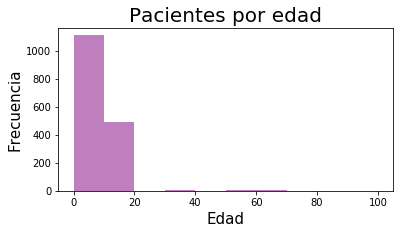

In [14]:
plt.figure(figsize=(6, 3))
plt.subplot(111)
plt.hist(df['Age'],color='purple', alpha=0.5, range=(0,100))
plt.title('Pacientes por edad',fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

Hay algunos pocos pacientes mayores de 20 años. Seguramente se haya registrado mal la edad de estos pacientes. Vamos a eliminar estos datos.

In [15]:
df.drop(dfcountAge']>20].index,inplace=True)
df.info()

SyntaxError: EOL while scanning string literal (3310478278.py, line 1)